# Basic classification using Keras

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegressionCV

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [3]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


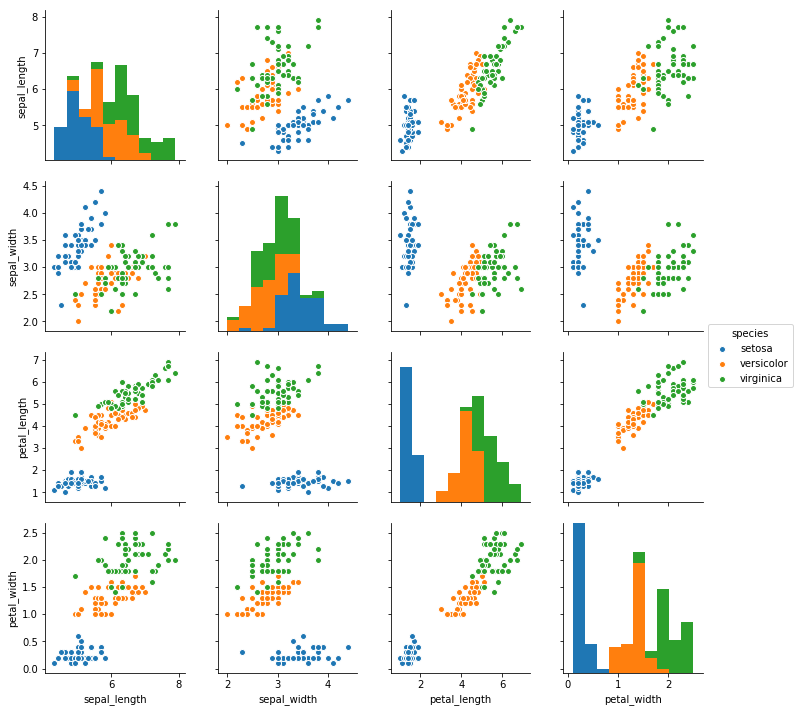

In [5]:
%matplotlib inline
sns.pairplot(iris, hue='species')

## Prepare the data

In [7]:
X = iris.values[:, :4]
y = iris.values[:, 4]
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, random_state=0)

## Compare accuracy to Logistic regression 

In [9]:
lr = LogisticRegressionCV()
lr.fit(train_X, train_y)
print("Accuracy = {:.2f}".format(lr.score(test_X, test_y)))

Accuracy = 0.83


In [10]:
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

train_y_ohe = one_hot_encode_object_array(train_y)
test_y_ohe = one_hot_encode_object_array(test_y)

## Build the model

In [13]:
model = Sequential()
model.add(Dense(16, input_shape=(4,)))
model.add(Activation('sigmoid'))
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [16]:
model.fit(train_X, train_y_ohe, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
75/75 [==============================] - 0s - loss: 0.0585 - acc: 0.9867     
Epoch 2/100
75/75 [==============================] - 0s - loss: 0.0579 - acc: 0.9867     
Epoch 3/100
75/75 [==============================] - 0s - loss: 0.0593 - acc: 0.9867     
Epoch 4/100
75/75 [==============================] - 0s - loss: 0.0614 - acc: 0.9733     
Epoch 5/100
75/75 [==============================] - 0s - loss: 0.0577 - acc: 0.9733        
Epoch 6/100
75/75 [==============================] - 0s - loss: 0.0635 - acc: 0.9867        
Epoch 7/100
75/75 [==============================] - 0s - loss: 0.0594 - acc: 0.9867        
Epoch 8/100
75/75 [==============================] - 0s - loss: 0.0594 - acc: 0.9733     
Epoch 9/100
75/75 [==============================] - 0s - loss: 0.0574 - acc: 0.9733     
Epoch 10/100
75/75 [==============================] - 0s - loss: 0.0612 - acc: 0.9867     
Epoch 11/100
75/75 [==============================] - 0s - loss: 0.0577 - acc: 0.9867     

75/75 [==============================] - 0s - loss: 0.0488 - acc: 0.9733     
Epoch 91/100
75/75 [==============================] - 0s - loss: 0.0491 - acc: 0.9867     
Epoch 92/100
75/75 [==============================] - 0s - loss: 0.0551 - acc: 0.9733     
Epoch 93/100
75/75 [==============================] - 0s - loss: 0.0522 - acc: 0.9733        
Epoch 94/100
75/75 [==============================] - 0s - loss: 0.0568 - acc: 0.9733        
Epoch 95/100
75/75 [==============================] - 0s - loss: 0.0472 - acc: 0.9867        
Epoch 96/100
75/75 [==============================] - 0s - loss: 0.0476 - acc: 0.9867        
Epoch 97/100
75/75 [==============================] - 0s - loss: 0.0493 - acc: 0.9867        
Epoch 98/100
75/75 [==============================] - 0s - loss: 0.0483 - acc: 0.9867     
Epoch 99/100
75/75 [==============================] - 0s - loss: 0.0481 - acc: 0.9733        
Epoch 100/100
75/75 [==============================] - 0s - loss: 0.0477 - acc: 0.986

In [17]:
loss, accuracy = model.evaluate(test_X, test_y_ohe, verbose=1)
print("Accuracy = {:.2f}".format(accuracy))

32/75 [===========>..................] - ETA: 0sAccuracy = 0.97
